# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
max_price_id = ds["price"].idxmax()
max_price_id
all_row_max = ds.loc[max_price_id]

print(f"La casa con dirección: {all_row_max['address']} es la mas cara y su precio es de: {all_row_max['price']}")

La casa con dirección: El Escorial es la mas cara y su precio es de: 8500000


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [3]:
import numpy as np
# Como no quiero poner que una casa vale 0 voy a poner un filtro que me muestre casas con precio arriba de 0
ds["price"] = ds["price"].replace([0], [np.nan])

price_min_id = ds["price"].idxmin()
all_row_min = ds.loc[price_min_id]
print(f"La casa con dirección: {all_row_min['address']} es la más barata y su precio es de {all_row_min['price']}")

La casa con dirección: Berlin, Coslada es la más barata y su precio es de 600.0


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [5]:
# TODO

max_surface = ds.sort_values(by="surface", ascending=False)
min_surface = ds.sort_values(by="surface", ascending=True)

casa_grande = max_surface.iloc[0]
casa_pequeña = min_surface.iloc[0]

print(f"La casa más grande está ubicada en {casa_grande['address']} y su superficie es de {casa_grande['surface']}")
print(f"La casa más grande está ubicada en {casa_pequeña['address']} y su superficie es de {casa_pequeña['surface']}")

La casa más grande está ubicada en Sevilla la Nueva y su superficie es de 249000.0
La casa más grande está ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15.0


In [6]:
ds["surface"].idxmax()
#ds["surface"].idxmin()

6794

#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [7]:
# TODO

poblaciones_unicas = ds["level5"].unique()
cantidad_poblaciones = len(poblaciones_unicas)
poblaciones_separadas = ", ".join(poblaciones_unicas)
print(poblaciones_separadas)

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [12]:
# TODO

tiene_nulos = ds.isnull()
tiene_nulos2 = tiene_nulos.any().any()
print(tiene_nulos2)

if tiene_nulos2:
    for columna in tiene_nulos.columns:
        filas_con_nulos = tiene_nulos[tiene_nulos[columna]].index.tolist()
        if filas_con_nulos:  # Si hay filas con NA
            print(f"Columna: {columna}, Filas con NA: {filas_con_nulos}")

True
Columna: realEstate_name, Filas con NA: [803, 1190, 2104, 2907, 2908, 4969, 5246, 5958, 7192, 10585]
Columna: phone_realEstate, Filas con NA: [9, 20, 21, 22, 23, 24, 25, 26, 27, 28, 85, 122, 138, 157, 218, 221, 222, 242, 247, 257, 300, 390, 391, 430, 434, 435, 436, 440, 441, 454, 457, 489, 644, 662, 666, 682, 693, 737, 756, 765, 787, 788, 789, 796, 797, 798, 799, 803, 804, 811, 813, 814, 815, 821, 823, 829, 847, 892, 893, 894, 895, 957, 958, 987, 988, 1001, 1033, 1053, 1054, 1059, 1086, 1087, 1088, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1155, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1210, 1213, 1216, 1263, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1422, 1466, 1468, 1479, 1491, 1506, 1507, 1523, 1527, 1532, 1538, 1564, 1659, 1666, 1699, 1729, 1794, 1825, 1857, 1861, 1867, 1896, 1898, 1923, 1934, 1935, 1964, 1979, 1980, 2016, 2021, 2026, 2062, 2104, 2153, 2176, 2221, 2223, 2228, 2230, 2232, 2237, 2256, 2268, 2270, 2271, 2281, 2284, 2288, 2321, 2323,

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [13]:
# TODO

ds_sin_nulos = ds.dropna()

print(len(ds), len(ds_sin_nulos))

15335 0


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [28]:
# TODO

arroyomolinos = ds["level5"].str.contains("arroyomolinos".lower(), case=False)

media_precio = ds.loc[arroyomolinos, "price"].mean()

print(media_precio)

298905.1777777778


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


(array([19., 18., 30., 18., 32., 11.,  2.,  2.,  1.,  2.]),
 array([165338. , 206804.2, 248270.4, 289736.6, 331202.8, 372669. ,
        414135.2, 455601.4, 497067.6, 538533.8, 580000. ]),
 <BarContainer object of 10 artists>)

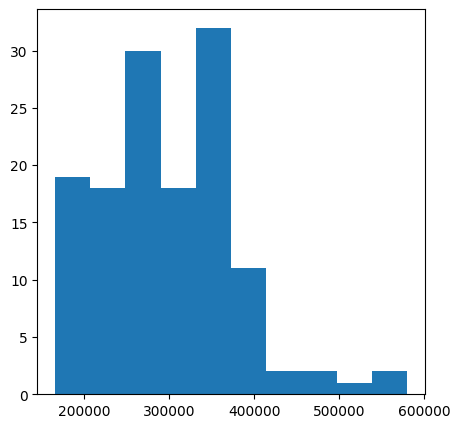

In [25]:
# TODO: Code

import matplotlib.pyplot as plt

precio = ds.loc[arroyomolinos, "price"]

plt.figure(figsize=(5,5))
plt.hist(precio)

# Análisis del histograma
- La distribución de la mayoría de los precios están en el rango de "250,000" a "370,000"
- El promedio de precios en esa zona es de "300,000". Que se acerca bastante al promedio que sacamos anteriormente: "294541.5985"
- Hay algunas casas que están en el "0" y hay otras que están cerca del "600,000". Esto puede decir que tal vez hay outliers, y en caso de que se quiera entrenar algún algoritmo de machine learning, esto se debe de eliminar ya que afectaría de manera significativa al modelo.

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [16]:
# TODO

valdemorillo = ds["level5"] == "Valdemorillo"
galapagar = ds["level5"] == "Galapagar"

valdemorillo_price = ds.loc[valdemorillo, "price"].mean()
galapagar_price = ds.loc[galapagar, "price"].mean()

print(f"El precio promedio de 'Valdemorillo' es: {valdemorillo_price}\nY el precio promedio de 'Galapagar' es: {galapagar_price}")

El precio promedio de 'Valdemorillo' es: 363860.2931034483
Y el precio promedio de 'Galapagar' es: 360063.20238095237


- No son iguales. Aunque están cerca, esto no es así ya que existe una diferencia de ~3860 unidades, si bien no es mucho monetariamente, esto puede influir directamente en que tan grande sería la casa.

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [17]:
# TODO

valdemorillo = ds["level5"] == "Valdemorillo"
galapagar = ds["level5"] == "Galapagar"

valdemorillo_price = ds.loc[valdemorillo, "price"].mean()
galapagar_price = ds.loc[galapagar, "price"].mean()

valdemorillo_surface = ds.loc[valdemorillo, "surface"].mean()
galapagar_surface = ds.loc[galapagar, "surface"].mean()

pps_valdemorillo = valdemorillo_price / valdemorillo_surface
pps_galapagar = galapagar_price / galapagar_surface

print(f"El promedio de precio por metro cuadrado de 'Valdemorillo' es: {pps_valdemorillo}\nY el promedio de precio por metro cuadrado de 'Galapagar' es: {pps_galapagar}")

El promedio de precio por metro cuadrado de 'Valdemorillo' es: 1039.5447972876266
Y el promedio de precio por metro cuadrado de 'Galapagar' es: 1178.5257998852853


- Tampoco es igual. Aquí destaca más porque el precio promedio por metro cuadrado de Galapagar, ya que es mas caro. En el anterior ejercicio se vio que el precio promedio más caro de los bienes es de Valdemorillo, sin embargo aquí destaca que el precio promedio por metro cuadrado más cara es de Galapagar, o sea, que en Galapagar son más grandes las casas.

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

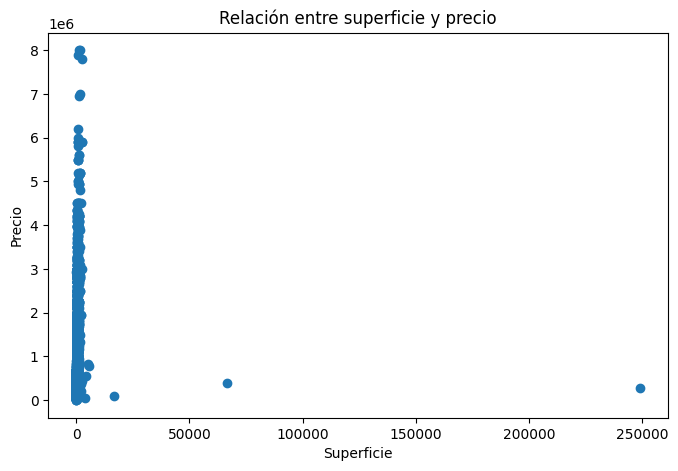

In [18]:
# TODO: Código

plt.figure(figsize=(8, 5))
plt.scatter(x=ds["surface"], y=ds["price"])
plt.xlabel("Superficie")
plt.ylabel("Precio")
plt.title("Relación entre superficie y precio")
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [19]:
# TODO

num_agencias = ds["realEstate_name"].nunique()
print(f"Número de agencias de bienes raíces: {num_agencias}")

Número de agencias de bienes raíces: 1821


- Pienso que la forma de verificar cuántas agencias es ver en cuáles url cambia "fotocasa" o alguna diferente, pero no se me ocurre como poder hacerlo, como filtrarlos de esa manera.

#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [20]:
# TODO

poblacion_mas_casas = ds["level5"].value_counts().idxmax()
num_casas = ds["level5"].value_counts().max()
print(f"Población con más casas: {poblacion_mas_casas} ({num_casas})")

Población con más casas:  Madrid Capital (6643)


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [30]:
# TODO

localidades = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón", "Fuenlabrada", "Leganes", "Getafe", "Alcorcon"]
cinturon_sur = ds[ds["level5"].isin(localidades)]
cinturon_sur

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000.0,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000.0,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000.0,...,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000.0,...,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000.0,...,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000.0,...,0,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000.0,...,0,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000.0,...,0,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000.0,...,0,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN


#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

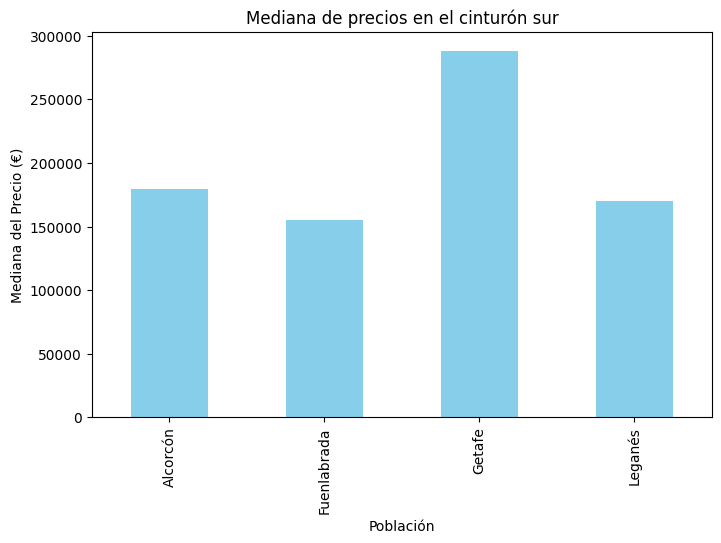

In [31]:
# TODO: Code

medianas = cinturon_sur.groupby("level5")["price"].median()
medianas.plot(kind="bar", figsize=(8, 5), color="skyblue")
plt.xlabel("Población")
plt.ylabel("Mediana del Precio (€)")
plt.title("Mediana de precios en el cinturón sur")
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [32]:
# TODO

variables = ["price", "rooms", "surface", "bathrooms"]
for var in variables:
    print(f"{var}: Media={cinturon_sur[var].mean()}, Varianza={cinturon_sur[var].var()}")

price: Media=226085.69162011173, Varianza=14444627877.728062
rooms: Media=3.0177383592017737, Varianza=0.7188858892927542
surface: Media=111.75222363405337, Varianza=4263.051760316337
bathrooms: Media=1.633221850613155, Varianza=0.5717968625577321


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [33]:
# TODO

casas_caras = cinturon_sur.loc[cinturon_sur.groupby("level5")["price"].idxmax(), ["level5", "address", "price"]]
print(casas_caras)

            level5                                address      price
5585      Alcorcón                               Alcorcón   950000.0
11561  Fuenlabrada  Calle de Paulo Freire, 5, Fuenlabrada   490000.0
2881        Getafe                                 Getafe  1050000.0
10412      Leganés           Avenida Reina Sofía, Leganés   650000.0


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_529/4254265233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cinturon_sur["price_norm"] = cinturon_sur.groupby("level5")["price"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))


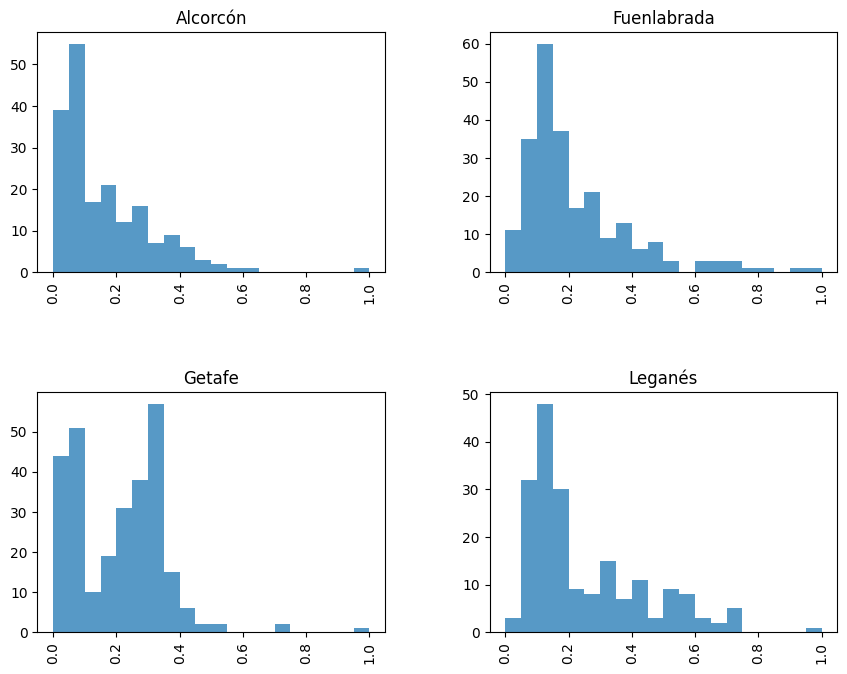

In [34]:
# TODO

cinturon_sur["price_norm"] = cinturon_sur.groupby("level5")["price"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
cinturon_sur.hist(column="price_norm", by="level5", figsize=(10, 8), bins=20, grid=False, alpha=0.75)
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [35]:
# TODO

municipios = ["Getafe", "Alcorcón", "Getafe", "Alcorcon"]
cinturon_sur["pps"] = cinturon_sur["price"] / cinturon_sur["surface"]
pps_municipios = cinturon_sur[cinturon_sur["level5"].isin(municipios)].groupby("level5")["pps"].describe()
print(pps_municipios)

          count         mean         std          min          25%  \
level5                                                               
Alcorcón  173.0  2239.302480  539.951527   604.761905  1904.081633   
Getafe    229.0  2174.593462  585.532018  1196.666667  1720.454545   

                  50%          75%          max  
level5                                           
Alcorcón  2207.792208  2472.727273  3698.159509  
Getafe    2060.606061  2643.243243  3827.160494  


/tmp/ipykernel_529/1091872633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cinturon_sur["pps"] = cinturon_sur["price"] / cinturon_sur["surface"]


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

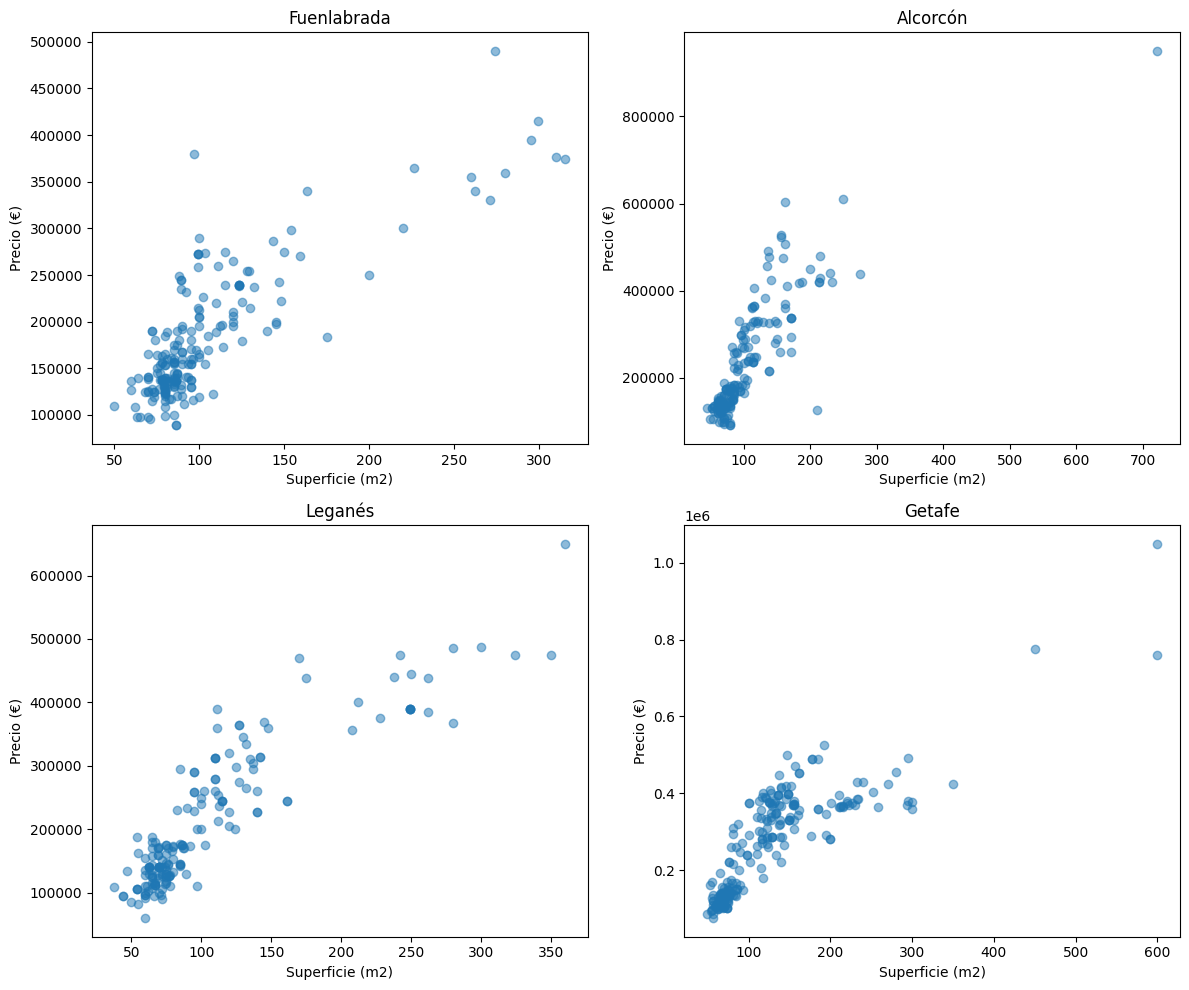

In [36]:
# TODO

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
poblaciones = cinturon_sur["level5"].unique()
for ax, poblacion in zip(axes.flatten(), poblaciones):
    subset = cinturon_sur[cinturon_sur["level5"] == poblacion]
    ax.scatter(subset["surface"], subset["price"], alpha=0.5)
    ax.set_title(poblacion)
    ax.set_xlabel("Superficie (m2)")
    ax.set_ylabel("Precio (€)")
plt.tight_layout()
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [ ]:
from ipyleaflet import Map, basemaps, CircleMarker

# Mapa centrado en Madrid
map = Map(center = (40.35, -3.8), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [47]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:

poblaciones_unicas = cinturon_sur['level5'].unique()
colores = ['blue', 'red', 'green', 'purple']
mapa_colores = {}

for i, poblacion in enumerate(poblaciones_unicas):
    mapa_colores[poblacion] = colores[i % len(colores)]

mapa_colores = {poblacion: colores[i % len(colores)] 
                     for i, poblacion in enumerate(poblaciones_unicas)}

mapa_colores

for index, row in cinturon_sur.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    poblacion = row['level5']
    marker_color = mapa_colores[poblacion]
    marker = CircleMarker(
        location=(lat, lon),
        radius=6,
        color=marker_color,
        fill_color=marker_color,
        fill_opacity=0.7
    )
    map.add_layer(marker)

map


Map(bottom=395835.0, center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in…